# Manipulacion de series y dataframes (Ejemplo en vivo)

In [2]:
# Vamos a crear una estructura de serie
import pandas as pd
serie= pd.Series(data=[1,2,3,4],index=['David','Juan',1,2],name='SerieX')
serie

David    1
Juan     2
1        3
2        4
Name: SerieX, dtype: int64

In [4]:
# Algunas propiedades de la serie
print('Indice de la serie:',serie.index)
print('Valores de la serie:',serie.values)
print('Longitud de serie:',serie.count())
# Verificar nulos en la serie
serie.isna()

Indice de la serie: Index(['David', 'Juan', 1, 2], dtype='object')
Valores de la serie: [1 2 3 4]
Longitud de serie: 4


David    False
Juan     False
1        False
2        False
Name: SerieX, dtype: bool

In [5]:
# Filtrar un indice
serie.loc['David']

1

In [5]:
# Filtrar pero de otra forma
serie.iloc[0]

1

In [7]:
# Filtrar varios indices
serie.loc[['David',1]]

David    1
1        3
Name: SerieX, dtype: int64

In [11]:
import numpy as np
serie_2= pd.Series(data=[1,2,5,6,np.nan , 20,np.nan])
serie_2

0     1.0
1     2.0
2     5.0
3     6.0
4     NaN
5    20.0
6     NaN
dtype: float64

In [8]:
# Suma de nulos
serie_2.isnull().sum()

2

In [10]:
# Conteo de valores no tiene en cuenta los NaN
serie_2.value_counts()

5.0    2
1.0    1
2.0    1
6.0    1
dtype: int64

In [12]:
# Creemos un dataframe
valores= [1000, 3500, 3000, 4000, 3000 , 2450]
nombres= ['David','Juan','Pedro','Lucas','Andrea','Felipe']
genero=['M','M','M','M','F','M']
df= pd.DataFrame(data={'salarios':valores, 'genero':genero},index=nombres)
df

,salarios,genero
David,1000,M
Juan,3500,M
Pedro,3000,M
Lucas,4000,M
Andrea,3000,F
Felipe,2450,M


In [13]:
# filtremos por genero
df_m= df[df['genero']=='M']
print(df_m.head())
print('------')
df_f=df[df['genero']=='F']
print(df_f.head())

        salarios genero
David       1000      M
Juan        3500      M
Pedro       3000      M
Lucas       4000      M
Felipe      2450      M
------
Andrea    3000
Name: salarios, dtype: int64


In [15]:
# Otra forma
condicion_h = df['genero']=='M'
condicion_m = df['genero']=='F'
print(df[condicion_h])
print('-------------')
print(df[condicion_m])

        salarios genero
David       1000      M
Juan        3500      M
Pedro       3000      M
Lucas       4000      M
Felipe      2450      M
-------------
        salarios genero
Andrea      3000      F


In [16]:
# Algunas cosas adicionales
df.loc['David'][['salarios','genero']]

salarios    1000
genero         M
Name: David, dtype: object

In [19]:
df.loc[['David','Juan']][['salarios','genero']]

,salarios,genero
David,1000,M
Juan,3500,M


# Lectura de csv t txt

In [25]:
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [21]:
%cd '/content/gdrive/MyDrive'
df= pd.read_csv('winequality-red.csv',sep=',')
print(df[['density','pH','sulphates','alcohol','quality']].head())

/content/gdrive/MyDrive
   density    pH  sulphates  alcohol  quality
0   0.9978  3.51       0.56      9.4        5
1   0.9968  3.20       0.68      9.8        5
2   0.9970  3.26       0.65      9.8        5
3   0.9980  3.16       0.58      9.8        6
4   0.9978  3.51       0.56      9.4        5


In [22]:
%cd '/content/gdrive/MyDrive'
df= pd.read_csv('pokemon_data.txt',delimiter='\t')
print(df[['Name','Type 1','HP','Attack','Defense']].head())

/content/gdrive/MyDrive
                    Name Type 1  HP  Attack  Defense
0              Bulbasaur  Grass  45      49       49
1                Ivysaur  Grass  60      62       63
2               Venusaur  Grass  80      82       83
3  VenusaurMega Venusaur  Grass  80     100      123
4             Charmander   Fire  39      52       43


In [23]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


# Lectura de xlsx

In [26]:
%cd '/content/gdrive/MyDrive'
df= pd.read_excel('defaultoutput.xlsx')
print(df[['index','ID','Year_Birth','Education','Income']].head())

/content/gdrive/MyDrive
   index    ID  Year_Birth   Education   Income
0      0  5524        1957  Graduation  58138.0
1      1  2174        1954  Graduation  46344.0
2      2  4141        1965  Graduation  71613.0
3      3  6182        1984  Graduation  26646.0
4      4  5324        1981         PhD  58293.0


# Lectura desde Github /Apis

In [27]:
import pandas as pd

url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url, index_col=0)
print(df[['AMZN','MCD','SBUX','GOOG','MSFT']].head(5).round(1))

                 AMZN    MCD  SBUX   GOOG  MSFT
formatted_date                                 
2016-01-01      587.0  106.3  54.4  743.0  49.9
2016-02-01      552.5  100.7  52.1  697.8  46.0
2016-03-01      593.6  108.8  53.6  745.0  50.3
2016-04-01      659.6  109.5  50.5  693.0  45.5
2016-05-01      722.8  105.6  49.3  735.7  48.3


In [28]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2022-10-25 13:30:26--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0s      

2022-10-25 13:30:27 (45.4 MB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [29]:
filename = 'cars_clus.csv'
#Lectura
pdf = pd.read_csv(filename)
print ("Shape: ", pdf.shape)
print(pdf[['manufact','model','sales','resale']].head(5))

Shape:  (159, 16)
  manufact    model   sales  resale
0    Acura  Integra  16.919  16.360
1    Acura       TL  39.384  19.875
2    Acura       CL  14.114  18.225
3    Acura       RL   8.588  29.725
4     Audi       A4  20.397  22.255


# Adicional (No es necesario en clase)
Los datos se encuentran en la siguiente link:
[Data Acciones](https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv)



In [30]:
import pandas as pd

url = 'https://raw.githubusercontent.com/JJTorresDS/stocks-ds-edu/main/stocks.csv'
df = pd.read_csv(url, index_col=0)
print(df.head(5))

                       MCD       SBUX        GOOG        AMZN       MSFT  \
formatted_date                                                             
2016-01-01      106.332146  54.353962  742.950012  587.000000  49.853489   
2016-02-01      100.671043  52.064243  697.770020  552.520020  46.043667   
2016-03-01      108.782211  53.571442  744.950012  593.640015  50.339031   
2016-04-01      109.483307  50.457645  693.010010  659.590027  45.453705   
2016-05-01      105.648926  49.255203  735.719971  722.789978  48.306515   

                      JPM        BAC          C        MAR        HLT  \
formatted_date                                                          
2016-01-01      50.424938  12.573010  36.897804  57.754189  35.192841   
2016-02-01      48.033066  11.132540  33.707108  64.228912  41.061607   
2016-03-01      50.524323  12.021718  36.223217  67.336624  44.499886   
2016-04-01      53.919910  12.995729  40.153545  66.305466  43.716049   
2016-05-01      56.098225  13

In [31]:
df.head()

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
2016-02-01,100.671043,52.064243,697.770020,552.520020,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001


Miremos el tamaño de nuestro datraframe

In [32]:
df.shape

(71, 14)

11 filas x 14 columnas

Las columnas son los precios de acciones de:

1. MCD: Macdonals
2. SBUX: Starbucks
3. GOOG: Google
4. AMZN: Amazon
5. MSFT: Microsoft
6. JPM: JPMorgan Chase & Co.
7. BAC: Bank of America Corp
8. C: Citigroup
9. MAR: Pharma MAr
10. HLT: Hoteles Hilton
11. RCL: Royal Caribbean Cruises
12. V: Visa Inc.
13. MA: Mastercard 
14. PYPL: Paypal

# Analizando el comportamiento de una serie de tiempo

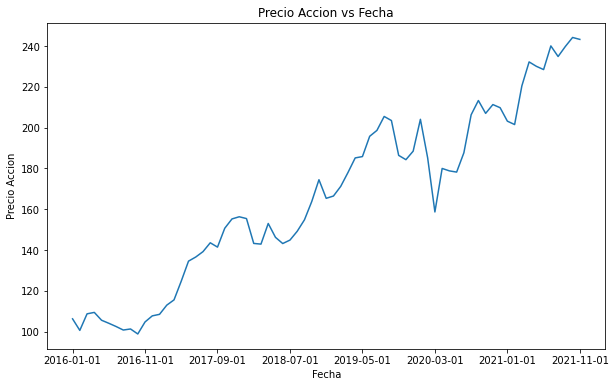

In [33]:
df['MCD'].plot(kind='line',figsize=(10,6),xlabel='Fecha', ylabel='Precio Accion', title='Precio Accion vs Fecha')

Se observa un comportamiento creciente entre el 01/01/21 hasta el 11/01/2021 

# Grafiquemos todas las series de tiempo

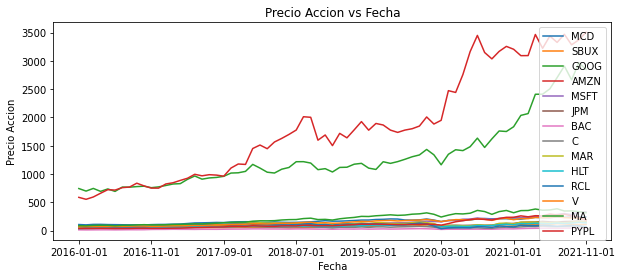

In [34]:
df.plot(kind='line',figsize=(10,4),xlabel='Fecha', ylabel='Precio Accion', title='Precio Accion vs Fecha').legend(loc='best')

**En cual accion invertirian y porque?**

Al parecer hay una gran diferencia en el comportamiento de las acciones **GOOG (Google) y AMZN (Amazon)** respecto a las demás, por otro lado podemos analizar el porcentaje de cambio cada día para entender como estan sucediendo los cambios diarios de manera porcentual

In [35]:
df_cambios=df.pct_change()*100
df_cambios

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL
formatted_date,,,,,,,,,,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01,-5.323980,-4.212607,-6.081162,-5.873932,-7.642037,-4.743432,-11.456848,-8.647389,11.210830,16.676025,-9.260620,-2.819154,-2.174320,5.534034
2016-03-01,8.057101,2.894882,6.761539,7.442263,9.328893,5.186545,7.987201,7.464626,4.838494,8.373462,11.029228,5.858393,8.720693,1.206080
2016-04-01,0.644495,-5.812418,-6.972280,11.109428,-9.704848,6.720700,8.102098,10.850302,-1.531349,-1.761435,-5.782089,0.993687,2.634911,1.502595
2016-05-01,-3.502252,-2.383072,6.162965,9.581702,6.276298,4.039907,1.579672,0.733041,-5.778272,-5.759658,-0.012928,2.200961,-0.924315,-3.547727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,5.073810,8.603882,7.904013,-3.272226,5.171653,-2.417375,-6.569298,-4.424032,6.929381,8.978606,-9.861628,5.375928,5.710923,-5.472078
2021-08-01,-2.163073,-3.244671,7.573531,4.303413,5.956268,5.990058,8.837328,7.138355,-7.425672,-5.013310,7.623261,-7.017328,-10.183470,4.765363
2021-09-01,2.093757,-5.746744,-8.384662,-5.351807,-6.433113,2.338235,1.676649,-2.405785,9.582653,5.806503,7.518425,-2.639177,0.418791,-9.855890


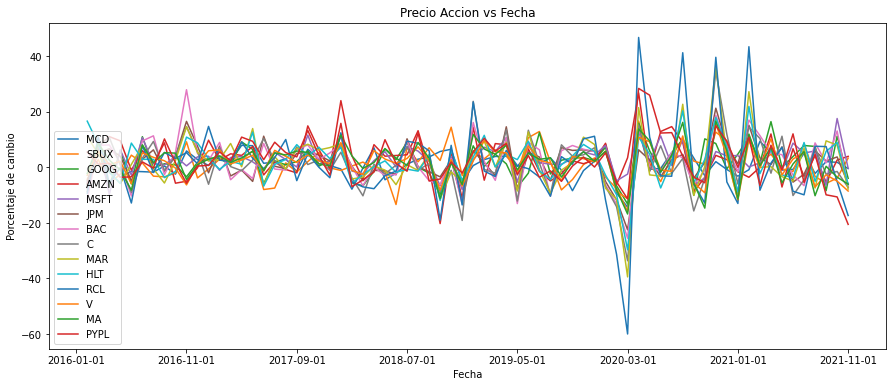

In [36]:
df_cambios.plot(kind='line',figsize=(15,6),xlabel='Fecha', ylabel='Porcentaje de cambio', title='Precio Accion vs Fecha').legend(loc='best')

**Siguen pensando lo mismo respecto a la pregunta anterior** 
Teniendo en cuenta esta información cual sería a la acción en la cual invertirian?

La respuesta en que accion invertir no solo pasa por el valor de la acción en si sino mas bien por factores asociados a la volatididad que pueda tener la acción.

Cuando se prefiere aversion al riesgo (evitar incertidumbre en inversiones) se requieren acciones que tengan poca volatilidad. 🧱 🈶 ☁ 🪗 ❎

Por el contrario cuando se asumen riesgos las inversiones podrían enfocarse en aquellas acciones con mayor volatilidad ⏰ ⚗ ⛹ ♟

# Grafico interactivo

Para generar un grafico dinamico podemos usar plotly con el fin de poder establecer el valor en cada momento del tiempo para cada accion

Ademas debemos hacer uso de la funcion ```melt``` que explicaremos posteriormente mas adelante pero consiste en formato long del dataframe para facilitar el grafico en plotly

In [37]:
df_n=df.copy()
df_n['Fecha']=df.index
df_n= df_n.reset_index(drop=True)
df_n

,MCD,SBUX,GOOG,AMZN,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL,Fecha
0,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999,2016-01-01
1,100.671043,52.064243,697.770020,552.520020,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999,2016-02-01
2,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998,2016-03-01
3,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000,2016-04-01
4,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,240.055786,120.441193,2704.419922,3327.590088,283.846313,150.006454,37.981613,66.635887,145.979996,131.449997,76.870003,245.622177,384.999420,275.529999,2021-07-01
67,234.863205,116.533272,2909.239990,3470.790039,300.752960,158.991928,41.338173,71.392593,135.139999,124.860001,82.730003,228.386063,345.793121,288.660004,2021-08-01
68,239.780670,109.836403,2665.310059,3285.040039,281.405182,162.709534,42.031269,69.675041,148.089996,132.110001,88.949997,222.358551,347.241272,260.209991,2021-09-01
69,244.196198,105.614609,2965.409912,3372.429932,331.014404,168.872391,47.551128,68.662384,160.020004,143.949997,84.430000,211.397858,335.096588,232.589996,2021-10-01


In [38]:
df_long=pd.melt(df_n , value_vars=df.columns,id_vars='Fecha')
df_long

,Fecha,variable,value
0,2016-01-01,MCD,106.332146
1,2016-02-01,MCD,100.671043
2,2016-03-01,MCD,108.782211
3,2016-04-01,MCD,109.483307
4,2016-05-01,MCD,105.648926
...,...,...,...
989,2021-07-01,PYPL,275.529999
990,2021-08-01,PYPL,288.660004
991,2021-09-01,PYPL,260.209991
992,2021-10-01,PYPL,232.589996


In [39]:
import plotly.express as px


fig=px.line(data_frame=df_long,x='Fecha',y='value',line_group='variable',color='variable',title='Comportamiento de precio de acciones',\
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()

# Excluyendo Amazon y GOOGLE

In [40]:
df_n=df.copy()
df_n['Fecha']=df.index
df_n= df_n.reset_index(drop=True)
df_n= df_n.drop(columns=['GOOG','AMZN'])
df_n

,MCD,SBUX,MSFT,JPM,BAC,C,MAR,HLT,RCL,V,MA,PYPL,Fecha
0,106.332146,54.353962,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999,2016-01-01
1,100.671043,52.064243,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999,2016-02-01
2,108.782211,53.571442,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998,2016-03-01
3,109.483307,50.457645,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000,2016-04-01
4,105.648926,49.255203,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001,2016-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,240.055786,120.441193,283.846313,150.006454,37.981613,66.635887,145.979996,131.449997,76.870003,245.622177,384.999420,275.529999,2021-07-01
67,234.863205,116.533272,300.752960,158.991928,41.338173,71.392593,135.139999,124.860001,82.730003,228.386063,345.793121,288.660004,2021-08-01
68,239.780670,109.836403,281.405182,162.709534,42.031269,69.675041,148.089996,132.110001,88.949997,222.358551,347.241272,260.209991,2021-09-01
69,244.196198,105.614609,331.014404,168.872391,47.551128,68.662384,160.020004,143.949997,84.430000,211.397858,335.096588,232.589996,2021-10-01


In [41]:
columnas=list(df.columns)
unwanted_num = {'AMZN', 'GOOG'}
 
col_final = [x for x in columnas if x not in unwanted_num]
col_final

['MCD',
 'SBUX',
 'MSFT',
 'JPM',
 'BAC',
 'C',
 'MAR',
 'HLT',
 'RCL',
 'V',
 'MA',
 'PYPL']

In [42]:
df_long=pd.melt(df_n , value_vars=col_final,id_vars='Fecha')
df_long

,Fecha,variable,value
0,2016-01-01,MCD,106.332146
1,2016-02-01,MCD,100.671043
2,2016-03-01,MCD,108.782211
3,2016-04-01,MCD,109.483307
4,2016-05-01,MCD,105.648926
...,...,...,...
847,2021-07-01,PYPL,275.529999
848,2021-08-01,PYPL,288.660004
849,2021-09-01,PYPL,260.209991
850,2021-10-01,PYPL,232.589996


In [43]:
import plotly.express as px


fig=px.line(data_frame=df_long,x='Fecha',y='value',line_group='variable',color='variable',title='Comportamiento de precio de acciones',\
             labels={
                     "Fecha": "Fecha_dias",
                     "value": "Precio (USD)"
                 })
fig.update_layout(paper_bgcolor="#FFFFFF",plot_bgcolor='#FFFFFF',)

fig.show()

Ahora se pueden ver mucho mejor las fluctuaciones de cada compañia que antes no era tan claro 